In [1]:
# import the important packages
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler

In [31]:
# define functions

# reads data from an xml-file
def read_data(file):
    with open(file, 'r') as f:
        data = f.read() 
    bs_data = bs(data, 'xml') 
    return bs_data

# calculates distance based on data, returns a dataframe
def calc_euclidian_distances(bs_data):
    b_name = bs_data.find_all('name')

    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    #print(attributes)
    
    # finds x-, y- and z-values and computes euclidian distance
    # for first values
    for i in range(int(len(b_name)/4)):
        a1 = b_name[i].find_all('component')[0].get('data')
        b1 = b_name[i].find_all('component')[1].get('data')
        c1 = b_name[i].find_all('component')[2].get('data')
        a1 = np.asarray([float(x) for x in a1.split(',')])
        b1 = np.asarray([float(y) for y in b1.split(',')])
        c1 = np.asarray([float(z) for z in c1.split(',')])
        r = (a1**2 + b1**2 + c1**2)**0.5
        # print(a1)
        
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df

In [32]:
import os
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        b_name = read_data("../Timeseries/" + xml_file)
        try:
            df1 = calc_euclidian_distances(b_name)
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")
        #print(df1['Right Pelvic Angles'], df1['Left Pelvic Angles'])
        #break

timeseries-11.xml failed to compute
timeseries-45.xml failed to compute
timeseries-6.xml failed to compute


 fail :(
 fail :(
 fail :(


Text(0, 0.5, 'Lefts')

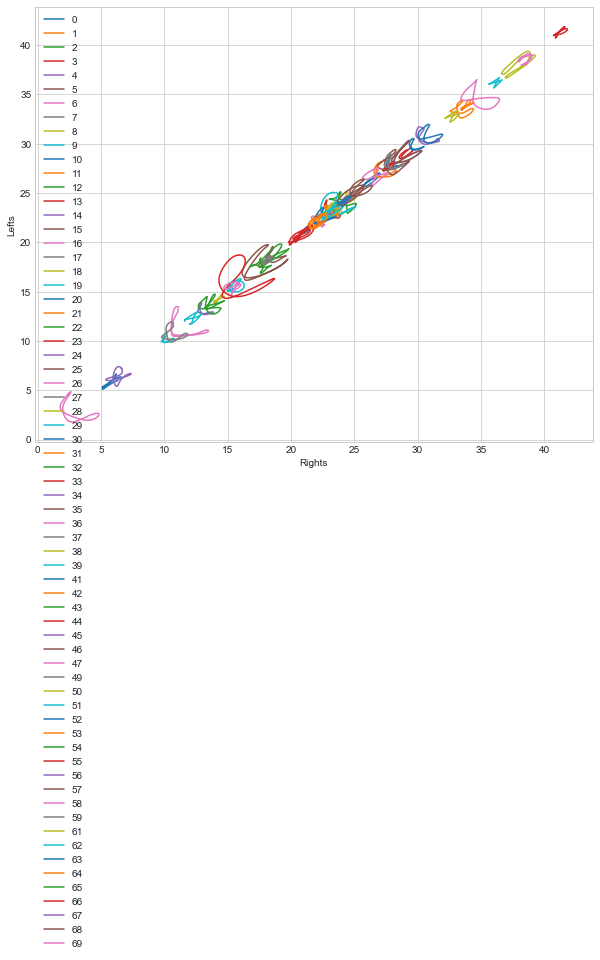

In [33]:
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print(" fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

 fail :(
 fail :(
 fail :(


Text(0, 0.5, 'Lefts')

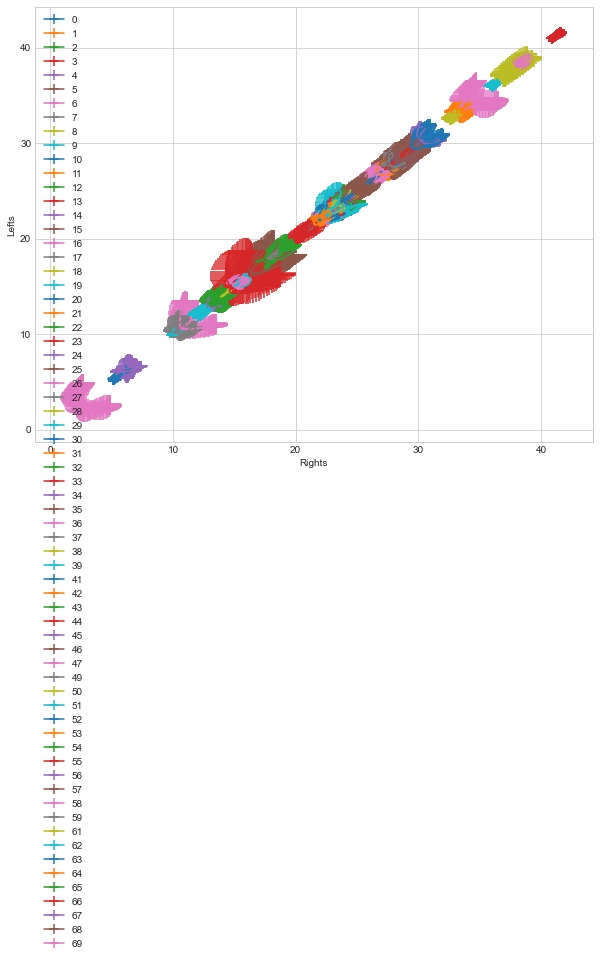

In [44]:
# plot std of people
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.errorbar(person['Right Pelvic Angles'], person['Left Pelvic Angles'], xerr=person['Right Pelvic Angles'].std(), yerr=person['Left Pelvic Angles'].std(), label = index)
    except: 
        print(" fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')


#plt.errorbar(x, y, e, linestyle='None', marker='^')

#plt.show()